In [5]:
!pip install scikit-learn


  Using cached scikit_learn-1.3.0-cp310-cp310-win_amd64.whl (9.2 MB)
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)


In [1]:
import pandas as pd

In [2]:
# features

# pelo longo?
# perna curta?
# faz auau?



porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 0, 1]
cachorro2 = [1, 0 , 1]
cachorro3 = [1, 1 ,1]

# 1 = porco 0 = cachorro
train_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
train_y = [1,1,1,0,0,0] # labels

In [6]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(train_x,train_y)

     ---------------------------------------- 9.2/9.2 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 44.0/44.0 MB 5.2 MB/s eta 0:00:00


C:\Users\lucca\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [7]:
animal_misterioso = [1,1,1]

model.predict([animal_misterioso])


array([0])

In [8]:
misterio1 = [1, 1, 1]
misterio2 = [1, 1, 0]
misterio3 = [0, 1, 1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]




In [9]:
previsoes = model.predict(teste_x)


In [10]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total *100
print('Taxa de acerto % .2f'% (taxa_de_acerto))



Taxa de acerto  100.00


In [11]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(teste_y,previsoes)
print('Taxa de acerto % .2f'% (taxa_de_acerto* 100))


Taxa de acerto  100.00


In [12]:
# Introdução a machine learning - classificação - projeto 2

In [13]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv')
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [14]:
x = dados[['home','how_it_works','contact']]
y = dados['bought']

In [15]:
train_x = x[:75]
train_y = y[:75]

test_x = x[75:]
test_y = y[75:]

In [16]:
model = LinearSVC()

In [17]:
model.fit(train_x,train_y)

previsoes = model.predict(test_x)
taxa_acerto = accuracy_score(test_y,previsoes)

print(f'A acurácia foi de {round(taxa_acerto*100,2)}%') 

A acurácia foi de 95.83%


C:\Users\lucca\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [18]:
# Usando biblioteca para separar train e test

from sklearn.model_selection import train_test_split


In [19]:
seed = 20

train_x, test_x, train_y, test_y = train_test_split(x , y ,random_state = seed, test_size = 0.25, stratify = y)
model.fit(train_x,train_y)

previsoes = model.predict(test_x)
taxa_acerto = accuracy_score(test_y,previsoes)

print(f'A acurácia foi de {round(taxa_acerto*100,2)}%') 

A acurácia foi de 96.0%


C:\Users\lucca\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [20]:
train_y.value_counts()

0    49
1    25
Name: bought, dtype: int64

In [21]:
test_y.value_counts()

0    17
1     8
Name: bought, dtype: int64

In [22]:
# Terceiro projeto
import seaborn as sns
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv')

In [23]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [24]:
troca = {
    1:0,
    0:1
}
dados['finished'] = dados.unfinished.map(troca)

In [25]:
dados.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='expected_hours', ylabel='price'>

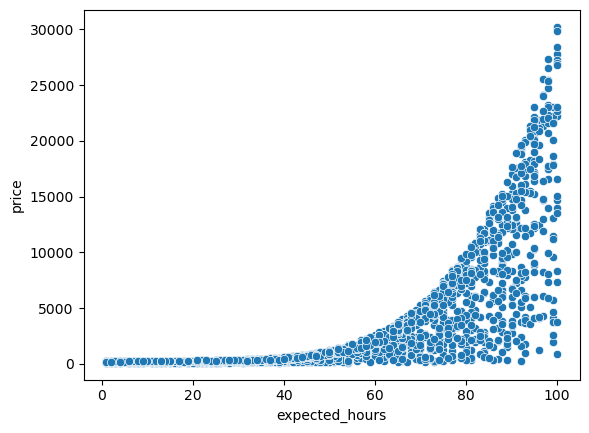

In [26]:
sns.scatterplot(x = 'expected_hours',y='price',data = dados)

<Axes: xlabel='expected_hours', ylabel='price'>

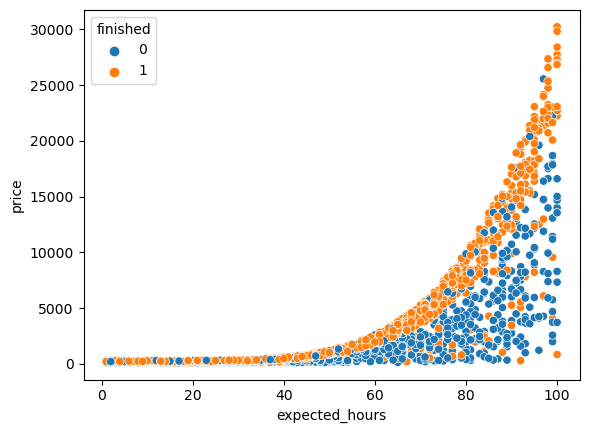

In [27]:
sns.scatterplot(x = 'expected_hours',y='price',hue = 'finished',data = dados)

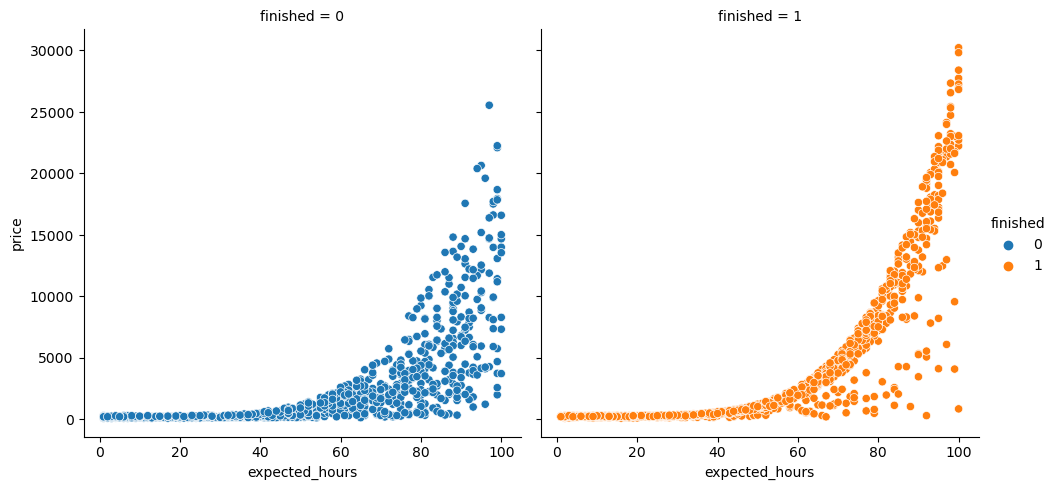

In [28]:
sns.relplot(x = 'expected_hours',y='price',hue = 'finished',col = 'finished',data = dados)

In [29]:
x = dados[['expected_hours','price']]
y = dados['finished']

In [30]:
seed = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = seed, test_size = 0.25, stratify = y)
model = LinearSVC()

print(f'Treinaremos com {len(treino_x)} elementos e testaremos com {len(teste_x)} elementos')
model.fit(treino_x,treino_y)

previsao = model.predict(teste_x)

acuracia = accuracy_score(teste_y, previsao) * 100

print(f'A acurácia foi de {round(acuracia,2)}%')

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 54.07%


C:\Users\lucca\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lucca\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
import numpy as np

previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100

print(f'A acurácia do algoritmo de previsão de baseline foi de {round(acuracia,2)}%')

A acurácia do algoritmo de previsão de baseline foi de 52.59%


<Axes: xlabel='expected_hours', ylabel='price'>

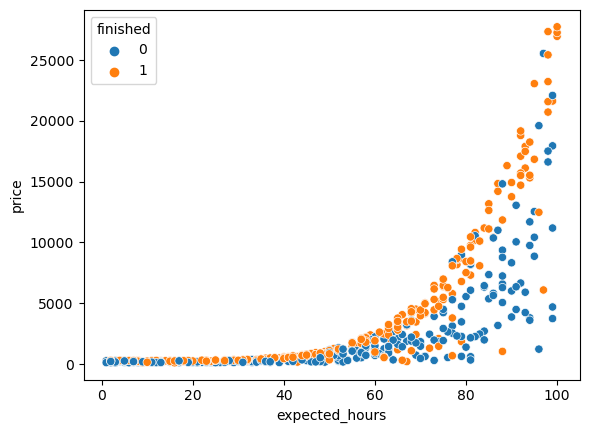

In [32]:
sns.scatterplot(x = 'expected_hours',y='price',hue = teste_y,data = teste_x)

In [33]:
x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()

y_min = teste_x.price.min()
y_max = teste_x.price.max()

print(x_min,x_max,y_min,y_max)

1 100 101 27738


In [34]:
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)

eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [35]:
xx, yy = np.meshgrid(eixo_x,eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [36]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

C:\Users\lucca\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [37]:
import matplotlib.pyplot as plt

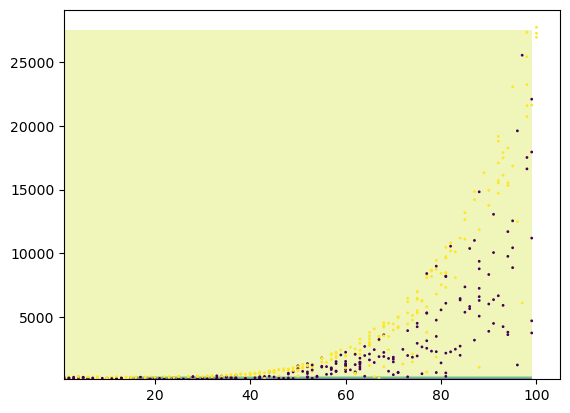

In [40]:

plt.contourf(xx,yy,Z, alpha = 0.3)
plt.scatter(teste_x.expected_hours, teste_x.price, c= teste_y, s = 1)

In [42]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


C:\Users\lucca\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


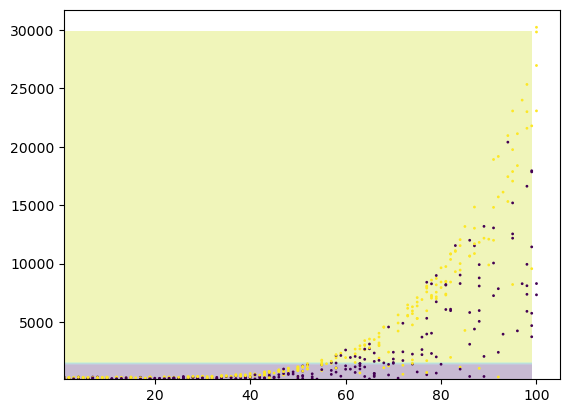

In [45]:
x_min = teste_x.expected_hours.min()
x_max = teste_x.expected_hours.max()
y_min = teste_x.price.min()
y_max = teste_x.price.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.expected_hours, teste_x.price, c=teste_y, s=1)

# DECISION BOUNDARY

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


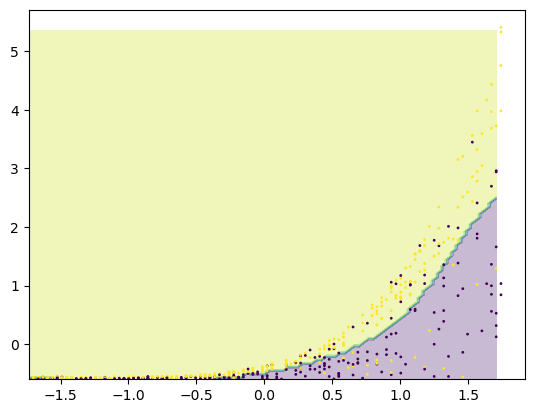

In [48]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


In [53]:


uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [54]:
a_renomear = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [55]:
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [56]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [57]:
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [58]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [60]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 46.88%


C:\Users\lucca\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lucca\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [66]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 58.00%


In [67]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


In [68]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier()
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 73.32%


In [71]:
from sklearn.tree import export_graphviz

export_graphviz(modelo)


'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[0] <= 59999.074\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="x[0] <= 40070.154\\ngini = 0.202\\nsamples = 3248\\nvalue = [370, 2878]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1441\\nvalue = [0, 1441]"] ;\n1 -> 2 ;\n3 [label="x[0] <= 40723.646\\ngini = 0.326\\nsamples = 1807\\nvalue = [370, 1437]"] ;\n1 -> 3 ;\n4 [label="x[0] <= 40644.25\\ngini = 0.441\\nsamples = 61\\nvalue = [20, 41]"] ;\n3 -> 4 ;\n5 [label="x[1] <= 23.5\\ngini = 0.397\\nsamples = 55\\nvalue = [15, 40]"] ;\n4 -> 5 ;\n6 [label="x[0] <= 40086.025\\ngini = 0.346\\nsamples = 45\\nvalue = [10, 35]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n6 -> 7 ;\n8 [label="x[0] <= 40171.676\\ngini = 0.325\\nsamples = 44\\nvalue = [9, 35]"] ;\n6 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 8\\nvalue = [0, 8]"] ;\n8 -> 9 ;\n10 [lab

In [72]:
from sklearn.tree import export_graphviz

export_graphviz(modelo, out_file=None)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="x[0] <= 59999.074\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="x[0] <= 40070.154\\ngini = 0.202\\nsamples = 3248\\nvalue = [370, 2878]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1441\\nvalue = [0, 1441]"] ;\n1 -> 2 ;\n3 [label="x[0] <= 40723.646\\ngini = 0.326\\nsamples = 1807\\nvalue = [370, 1437]"] ;\n1 -> 3 ;\n4 [label="x[0] <= 40644.25\\ngini = 0.441\\nsamples = 61\\nvalue = [20, 41]"] ;\n3 -> 4 ;\n5 [label="x[1] <= 23.5\\ngini = 0.397\\nsamples = 55\\nvalue = [15, 40]"] ;\n4 -> 5 ;\n6 [label="x[0] <= 40086.025\\ngini = 0.346\\nsamples = 45\\nvalue = [10, 35]"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n6 -> 7 ;\n8 [label="x[0] <= 40171.676\\ngini = 0.325\\nsamples = 44\\nvalue = [9, 35]"] ;\n6 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 8\\nvalue = [0, 8]"] ;\n8 -> 9 ;\n10 [lab

In [3]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

NameError: name 'modelo' is not defined

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


NameError: name 'np' is not defined

In [5]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico


NameError: name 'x' is not defined

In [ ]:
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

In [ ]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

In [ ]:
modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)